In [13]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [14]:
print(data.shape)

(285, 2500)


In [15]:
print(target.shape)

(285,)


In [16]:
# counting how much lables in tha target dataset
import collections
print(collections.Counter(target))

Counter({np.int32(1): 113, np.int32(2): 91, np.int32(0): 81})


In [17]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf')

model = make_pipeline(pca,svc)

In [23]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

In [24]:
model.fit(train_data,train_target)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC())])

In [25]:
predicted_target = model.predict(test_data)

In [26]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_target,predicted_target)
print(acc)

0.9655172413793104


In [27]:
from sklearn.metrics import classification_report

print(classification_report(test_target,predicted_target,target_names=['Barac Obama', 'Donal Trump', 'Goge bull']))

              precision    recall  f1-score   support

 Barac Obama       1.00      0.83      0.91         6
 Donal Trump       0.93      1.00      0.97        14
   Goge bull       1.00      1.00      1.00         9

    accuracy                           0.97        29
   macro avg       0.98      0.94      0.96        29
weighted avg       0.97      0.97      0.96        29



In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

matrix = confusion_matrix(test_target,predicted_target)
print(matrix)

[[ 5  1  0]
 [ 0 14  0]
 [ 0  0  9]]


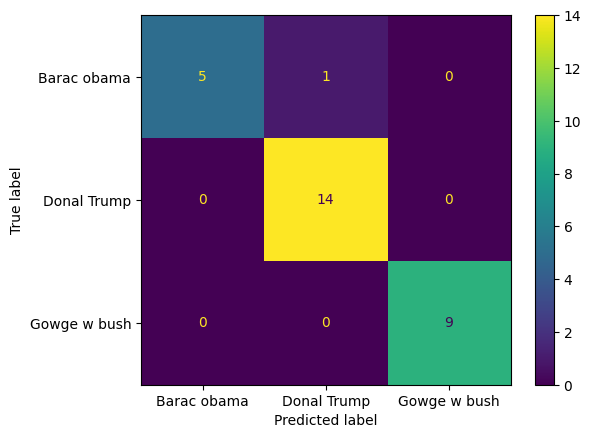

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=["Barac obama", "Donal Trump", "Gowge w bush"])
disp.plot()

In [31]:
import joblib

joblib.dump(model,"svm_face_recognisation.sav")

['svm_face_recognisation.sav']